# 06\. Pandas (60 min)

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [47]:
d = pd.read_csv("~/data/data_000637.txt")
N = np.random.randint(10000, d.shape[0])

d.head(N)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
569314,1,0,48,3869205928,2995,12
569315,1,0,63,3869205928,3054,2
569316,1,0,64,3869205928,3062,1
569317,1,1,3,3869205928,3103,16


2\. Find out the number of BX in a ORBIT (the value 'x').

In [2]:
bx_counter = d.groupby("ORBIT_CNT")["BX_COUNTER"].max()

print('x =', bx_counter.max())

x = 3563


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [16]:
total_time = bx_counter.max() * 25 * bx_counter.shape[0]
print('Estimated total time (ns):', int(total_time), 'ns')
print('Total time:', (d.iloc[-1, 3] - d.iloc[0, 3]) * 25 * bx_counter.max() + (d.iloc[-1, 4] - d.iloc[0, 4]) * 25 + (d.iloc[-1, 5] - d.iloc[0, 5]) * 25/30, 'ns')

Estimated total time (ns): 979914075 ns
Total time: 980140993.3333334 ns


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [13]:
d['TOTAL_TIME'] =  ((d['ORBIT_CNT'] - d.iloc[0, 3]) * 25 * bx_counter.max() + (d['BX_COUNTER'] - d.iloc[0, 4]) * 25 + (d['TDC_MEAS'] - d.iloc[0, 5]) * 25/30)

print(d)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

           TOTAL_TIME  
0        0.000000e+00  
1        8.333333e-01  
2        4.476667e+03  
3        4.594167e+03  
4        9.649167e+03  
...            

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [42]:
d['HEAD'] = np.random.randint(0, 2, size=d.shape[0])
print(d)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           0     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           0     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     0     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     0     0          139  3869211171         769         0   
1310719     0     0           61  3869211171         762        18   

           TOTAL_TIME  
0        0.000000e+00  
1        8.333333e-01  
2        4.476667e+03  
3        4.594167e+03  
4        9.649167e+03  
...            

6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [46]:
mask = d['HEAD'] == 1
d2 = d[mask]

print(d2)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
5           1     0           63  3869200167        2762         4   
7           1     0          139  3869200167        2776         0   
...       ...   ...          ...         ...         ...       ...   
1310712     1     1           35  3869211171         429         4   
1310713     1     0           64  3869211171         758        18   
1310714     1     0           60  3869211171         762         2   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   

           TOTAL_TIME  
1        8.333333e-01  
2        4.476667e+03  
3        4.594167e+03  
5        9.681667e+03  
7        1.002833e+04  
...            

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

(array([    0., 28438., 32669., 21970., 26403., 15003., 18869., 13646.,
        17813.,    80., 12951.,  9137., 12728.,  6188.,  8437.,  5570.,
         8367.,  3589.,  5215.,  3412.,  5750.,  2362.,  3638.,  2495.,
         4440.,  1756.,  2764.,  1836.,  3466.,  1339.,  2145.,  1510.,
         2910.,  1168.,  1898.,  1357.,  2528.,   956.,  1509.,  1038.,
         2081.,   828.,  1360.,   891.,  1792.,   680.,  1194.,   910.,
         1690.,   738.,  1134.,   832.,  1485.,   781.,  1078.,   840.,
         1427.,   731.,  1018.,   865.,  1473.,   780.,  1074.,   918.,
         1439.,   713.,   590.,   467.,   520.,   414.,   345.,   297.,
          312.,   318.,   249.,   202.,   205.,   217.,   165.,   155.,
          170.,   224.,   131.,   145.,   140.,   204.,   130.,   153.,
          146.,   206.,   145.,   164.,   159.,   283.,   196.,   249.,
          247.,   357.,   334.,   435.,   518.,   556.,   582.,   657.,
          678.,   752.,   730.,   724.,   855.,   752.,   813., 

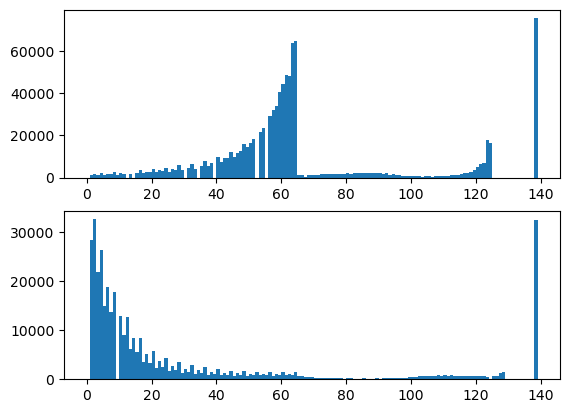

In [52]:
fpga0 = d[d['FPGA'] == 0]
fpga1 = d[d['FPGA'] == 1]

plt.subplot(2, 1, 1)
plt.hist(fpga0['TDC_CHANNEL'], bins=range(0, 140))

plt.subplot(2, 1, 2)
plt.hist(fpga1['TDC_CHANNEL'], bins=range(0, 140))

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [68]:
noise = d.groupby('TDC_CHANNEL').count()
noise = noise.sort_values(by='HEAD', ascending=False)

print(noise.head(3))

               HEAD    FPGA  ORBIT_CNT  BX_COUNTER  TDC_MEAS
TDC_CHANNEL                                                 
139          108059  108059     108059      108059    108059
64            66020   66020      66020       66020     66020
63            64642   64642      64642       64642     64642


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [71]:
unique_orbits = d['ORBIT_CNT'].unique()

print(unique_orbits)
print('Number of unique orbits:', unique_orbits.shape[0])

[3869200167 3869200168 3869200169 ... 3869211169 3869211170 3869211171]
Number of unique orbits: 11001


In [79]:
orbits139 = d[d['TDC_CHANNEL'] == 139]
unique_orbits139 = orbits139['ORBIT_CNT'].unique()

print(unique_orbits139)
print('Number of unique orbits:', unique_orbits139.shape[0])

[3869200167 3869200168 3869200169 ... 3869211169 3869211170 3869211171]
Number of unique orbits: 10976
